In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_aqi = df.groupby("City")['AQI'].mean().sort_values(ascending=False)
print(city_aqi.head(10))

City
Ahmedabad       452.122939
Delhi           259.487744
Patna           240.782042
Gurugram        225.123882
Lucknow         217.973059
Talcher         172.886819
Jorapokhar      159.251621
Brajrajnagar    150.280505
Kolkata         140.566313
Guwahati        140.111111
Name: AQI, dtype: float64


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Season'] = df['Month']%12 // 3 + 1

monthly_aqi = df.groupby("Month")['AQI'].mean()
seasonal_aqi = df.groupby("Season")['AQI'].mean()

In [6]:
pollutants = ['PM2.5','PM10','NO2','SO2','O3','CO']
df[pollutants].mean()

,0
PM2.5,67.450578
PM10,118.127103
NO2,28.560659
SO2,14.531977
O3,34.491430
CO,2.248598


In [7]:
cleanest_city = df.groupby("City")['AQI'].mean().sort_values().head(1)
print(cleanest_city)

City
Aizawl    34.765766
Name: AQI, dtype: float64


In [8]:
missing = df.isnull().sum()
print(missing)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Month             0
Season            0
dtype: int64


In [9]:
unsafe_cities = df[df['AQI'] > 100].groupby("City").size().sort_values(ascending=False)
print(unsafe_cities.head(10))

City
Delhi            1820
Lucknow          1513
Ahmedabad        1290
Patna            1288
Gurugram         1207
Hyderabad        1029
Chennai           931
Jaipur            773
Visakhapatnam     672
Bengaluru         671
dtype: int64


In [10]:
df['Weekday'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['Weekday'] >= 5
df.groupby("IsWeekend")['AQI'].mean()

,AQI
IsWeekend,
False,167.253074
True,164.497612


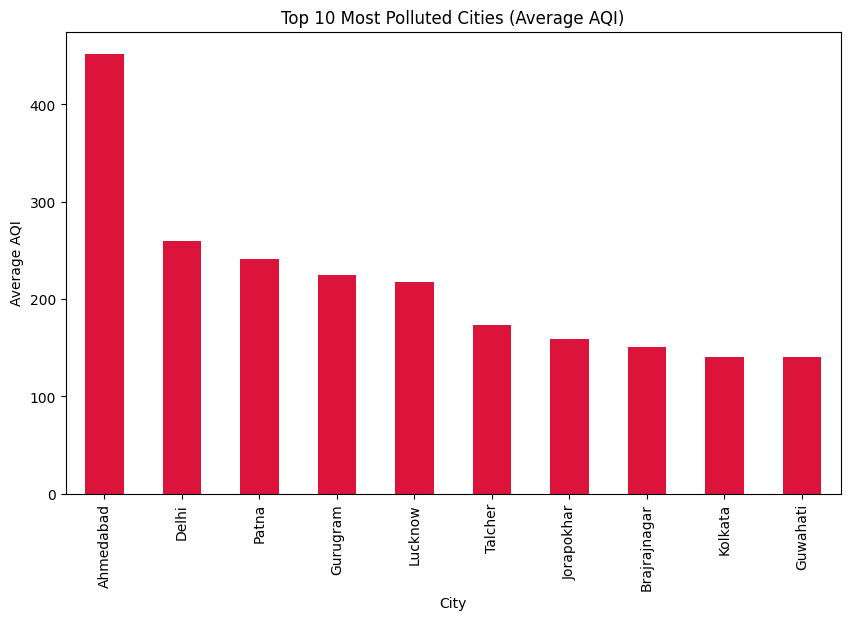

In [21]:
plt.figure(figsize=(10,6))
city_aqi.head(10).plot(kind='bar', color="crimson")
plt.title("Top 10 Most Polluted Cities (Average AQI)")
plt.ylabel("Average AQI")
plt.show()

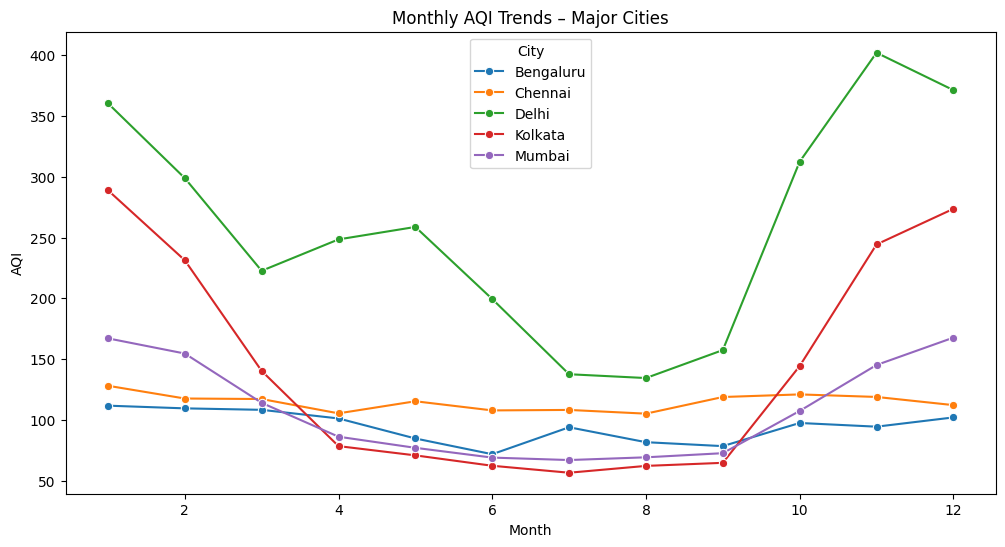

In [23]:
cities = ['Delhi','Mumbai','Kolkata','Chennai','Bengaluru']
monthly_trend = df[df['City'].isin(cities)].groupby(['Month','City'])['AQI'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='AQI', hue='City', data=monthly_trend, marker="o")
plt.title("Monthly AQI Trends – Major Cities")
plt.show()


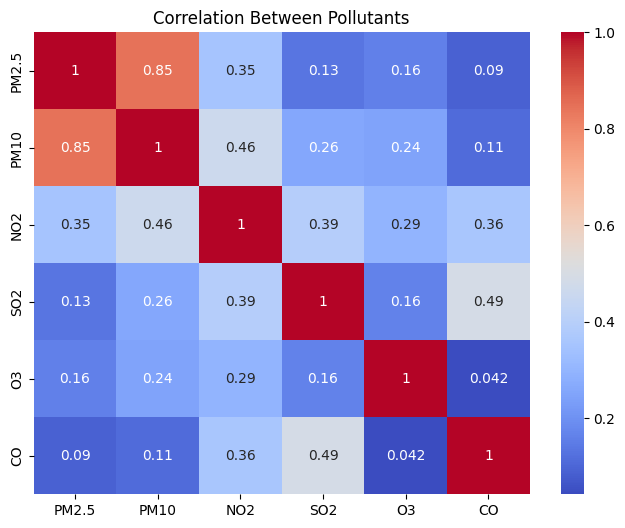

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants")
plt.show()

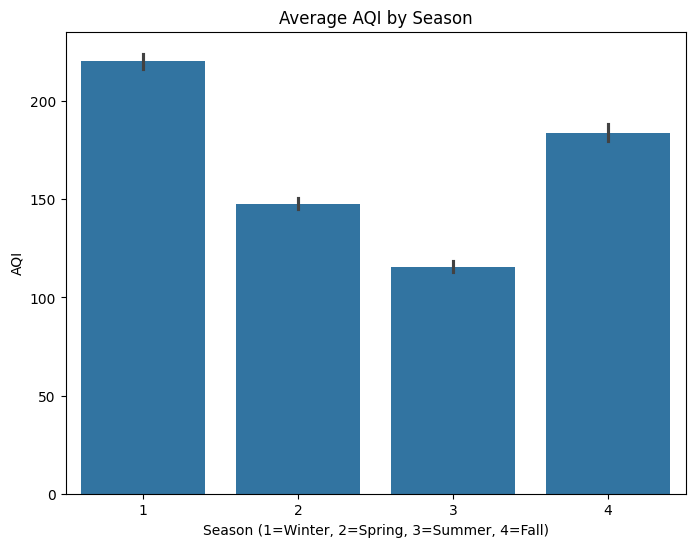

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='Season', y='AQI', data=df)
plt.title("Average AQI by Season")
plt.xlabel("Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)")
plt.show()

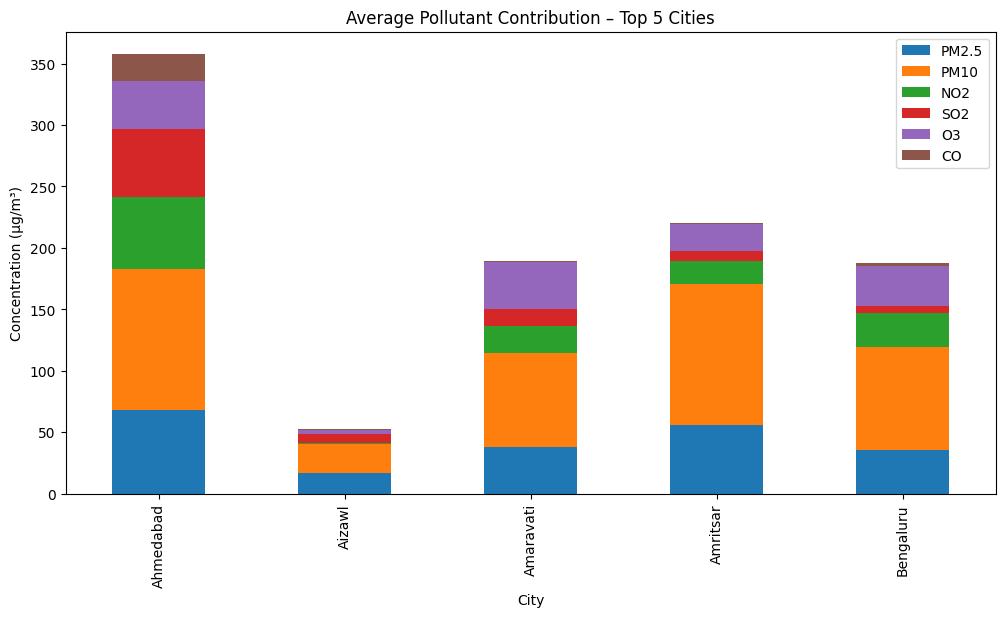

In [26]:
city_pollution = df.groupby('City')[pollutants].mean().head(5)
city_pollution.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Average Pollutant Contribution – Top 5 Cities")
plt.ylabel("Concentration (µg/m³)")
plt.show()

In [30]:
city_coords = {
    "Delhi": [28.7041, 77.1025],
    "Mumbai": [19.0760, 72.8777],
    "Kolkata": [22.5726, 88.3639],
    "Chennai": [13.0827, 80.2707],
    "Bengaluru": [12.9716, 77.5946],
    "Hyderabad": [17.3850, 78.4867]
}

coords_df = pd.DataFrame(city_coords).T.reset_index()
coords_df.columns = ["City", "Lat", "Lon"]

city_aqi_map = df.groupby('City')['AQI'].mean().reset_index()
city_aqi_map = city_aqi_map.merge(coords_df, on="City", how="inner")

import plotly.express as px
fig = px.scatter_geo(city_aqi_map, lat="Lat", lon="Lon",
                     color="AQI", size="AQI",
                     hover_name="City", projection="natural earth")
fig.show()


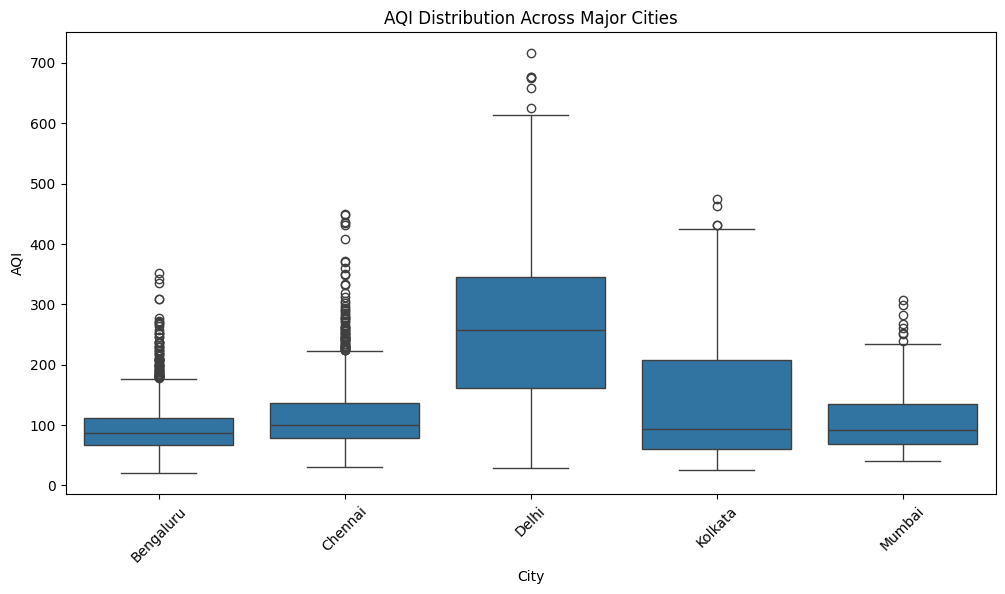

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='AQI', data=df[df['City'].isin(cities)])
plt.title("AQI Distribution Across Major Cities")
plt.xticks(rotation=45)
plt.show()